In [1]:
pip install kafka-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
from kafka import KafkaConsumer
from json import loads
import json
from io import StringIO
import pandas as pd
import ast
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import geopandas as gpd
import plotly.express as px
import pandas as pd
import time

In [4]:
Consumer=KafkaConsumer('topic3',                                
                      bootstrap_servers=['localhost:9092'],
                       api_version=(0,10)
                      )



In [5]:
def tryeval(val):   
    try:
        val = ast.literal_eval(val)
    except ValueError:
        
        pass
    return val

# Extracting the Coordinates

In [3]:
data_list=[]
t_end = time.time() + 60 * 60
for message in consumer:
    val=message.value
    stri=val.decode()
    stri=stri.replace("iss_position","")
    stri=stri.replace("\\","")
    stri=stri.replace("latitude","")     
    stri=stri.replace("longitude","")
    stri=stri.replace(":","")
    stri=stri.replace('""',"")
    stri=stri.replace(' ',"")
    stri=stri.replace('"',"")
    stri=stri[22:35]
    stri='[' + stri + ']'   
    real_value=tryeval(stri)
    data_list.append(real_value)  
    if time.time() > t_end:
        break

# Creating a Dataframe

In [4]:
data_cols=['Latitude','Longitude']
data1=pd.DataFrame(data_list,columns=data1_cols)

In [5]:
data1

,Latitude,Longitude
0,52.6892,30.88
1,52.9405,30.65
2,53.2154,30.41
3,53.4640,30.18
4,53.7113,29.96
...,...,...
454,-108.3025,7.30
455,-108.1191,7.50
456,-107.9169,7.80
457,-107.7146,8.10


# Plotting the Coordinates of the Satellite 

In [8]:
x=data1['Longitude']
y=data1['Latitude']

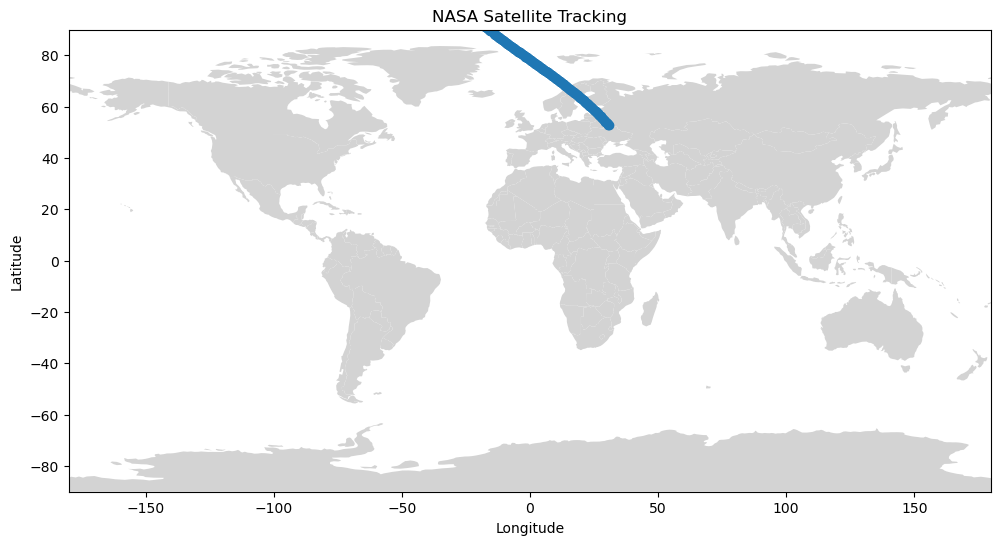

In [9]:
map1 = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(12, 6))
map1.plot(color="lightgrey", ax=ax)    
plt.scatter(x, y)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.title("NASA Satellite Tracking")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()